# Laboratorio 4 Analisis de texto

---
Jorge Caballeros 20009

Alejandra Guzmán

---


### Descripción de los datos
Primero, cargaremos el dataset y observaremos las primeras filas para tener una idea de su estructura y contenido.

In [43]:
import pandas as pd


data = pd.read_csv('train.csv')

data.head()



,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [44]:
# Descripción general del dataset
data_description = data.describe(include='all')

data_description


,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


Hay 7613 registros en total.
La columna keyword tiene 7552 registros no nulos, lo que significa que hay 61 registros con valores nulos.
La columna location tiene 5080 registros no nulos, lo que indica que hay 2533 registros con valores nulos.
El campo text tiene 7503 valores únicos, lo que significa que hay algunos mensajes que se repiten.
La columna target es binaria y tiene una media de 0.42966, lo que indica que hay una cantidad similar de registros con valores 0 y 1, aunque hay una ligera inclinación hacia el 0.

## Preprocesamiento de los datos

Necesitamos limpiar la data para poder procesarla , algunos de los campos estan en minusculas y otras en mayudculas , tambien hay diferentes simbolos de puntuacion que deben ser eliminados, tambien palabras vacias.

In [45]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
# Lista predefinida de stopwords en inglés
manual_stopwords = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself",
    "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which",
    "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be",
    "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an",
    "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for",
    "with", "about", "against", "between", "into", "through", "during", "before", "after", "above",
    "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further",
    "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few",
    "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too",
    "very", "s", "t", "can", "will", "just", "don", "should", "now"
])

def manual_preprocess(text):
    # Convertir el texto a minúsculas
    text = text.lower()
    # Eliminar URLs, menciones (@...), hashtags y números
    text = re.sub(r"http\S+|www\S+|https\S+|@\S+|#\S+|\d+", '', text, flags=re.MULTILINE)
    # Eliminar signos de puntuación
    text = re.sub(r'[^\w\s]', '', text)
    # Eliminación de stopwords
    text = ' '.join(word for word in text.split() if word not in manual_stopwords)
    return text

# Aplicar el preprocesamiento al texto
data['processed_text'] = data['text'].apply(manual_preprocess)

# Mostrar el texto original y el procesado para las primeras 5 filas
data[['text', 'processed_text']].head()


,text,processed_text
0,Our Deeds are the Reason of this #earthquake M...,deeds reason may allah forgive us
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,residents asked shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...",people receive evacuation orders california
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby smoke pours school


## Unigramas y Bigramas

Ahora podemos identifcar unigramas y bigramas

In [46]:
from collections import Counter
from nltk.util import ngrams

# Crear una lista con todas las palabras del texto procesado
words = [word for text in data['processed_text'] for word in text.split()]

# Obtener los unigramas más comunes
unigram_counts = Counter(words)

# Obtener los bigramas más comunes
bigram_counts = Counter(ngrams(words, 2))

# Mostrar los 10 unigramas y bigramas más comunes
top_10_unigrams = unigram_counts.most_common(10)
top_10_bigrams = bigram_counts.most_common(10)

top_10_unigrams, top_10_bigrams


([('like', 345),
  ('amp', 302),
  ('im', 299),
  ('fire', 247),
  ('get', 229),
  ('new', 224),
  ('via', 220),
  ('people', 194),
  ('one', 192),
  ('dont', 191)],
 [(('suicide', 'bomber'), 59),
  (('burning', 'buildings'), 58),
  (('liked', 'video'), 41),
  (('northern', 'california'), 41),
  (('cross', 'body'), 39),
  (('oil', 'spill'), 39),
  (('suicide', 'bombing'), 34),
  (('looks', 'like'), 33),
  (('california', 'wildfire'), 32),
  (('mass', 'murder'), 32)])

In [47]:
from collections import Counter

#Separar en los que son desastres y no son desastres.
disaster_tweets = data[data['target'] == 1]['processed_text']
non_disaster_tweets = data[data['target'] == 0]['processed_text']


disaster_word_freq = Counter(" ".join(disaster_tweets).split())
non_disaster_word_freq = Counter(" ".join(non_disaster_tweets).split())


disaster_top10 = disaster_word_freq.most_common(10)
non_disaster_top10 = non_disaster_word_freq.most_common(10)

disaster_top10, non_disaster_top10

([('fire', 177),
  ('via', 121),
  ('suicide', 110),
  ('amp', 109),
  ('disaster', 109),
  ('california', 107),
  ('police', 106),
  ('people', 104),
  ('killed', 92),
  ('like', 92)],
 [('like', 253),
  ('im', 243),
  ('amp', 193),
  ('new', 168),
  ('get', 163),
  ('dont', 141),
  ('one', 127),
  ('body', 111),
  ('via', 99),
  ('would', 97)])

Palabras que se repite en cada una de las categorías.


In [48]:
# Identify words that appear in both disaster and non-disaster tweets
common_words = set(disaster_word_freq.keys()) & set(non_disaster_word_freq.keys())

# Displaying some of the common words
list(common_words)[:10]


['burned',
 'whale',
 'forgot',
 'plug',
 'used',
 'apparent',
 'concern',
 'jack',
 'turning',
 'root']

## Nube de palabras para visualizar las palabras que aparecen con más frecuencia.

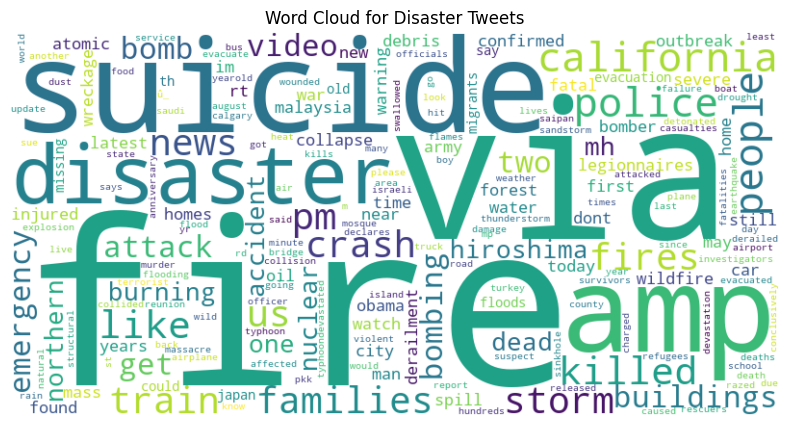

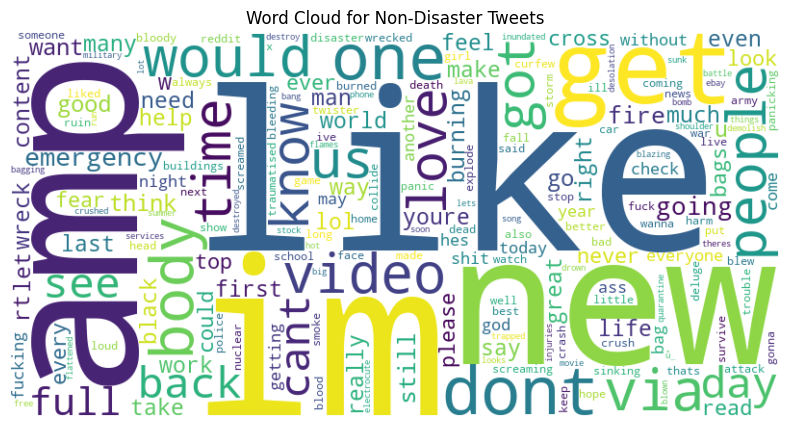

In [49]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Funciona para generar la nube de palabras
def generate_wordcloud(word_freq, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()


generate_wordcloud(disaster_word_freq, 'Word Cloud for Disaster Tweets')
generate_wordcloud(non_disaster_word_freq, 'Word Cloud for Non-Disaster Tweets')

## Histograma con las palabras que más se repiten

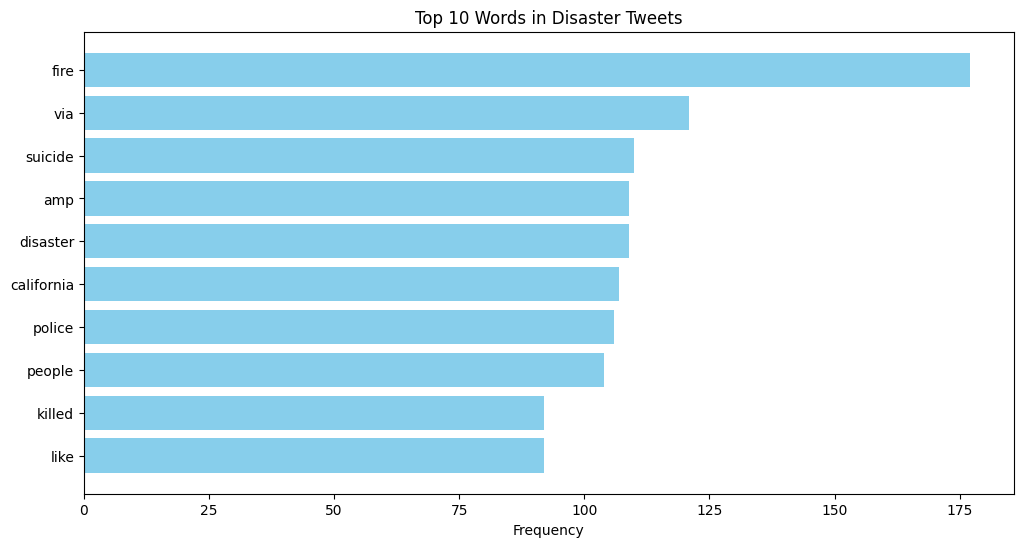

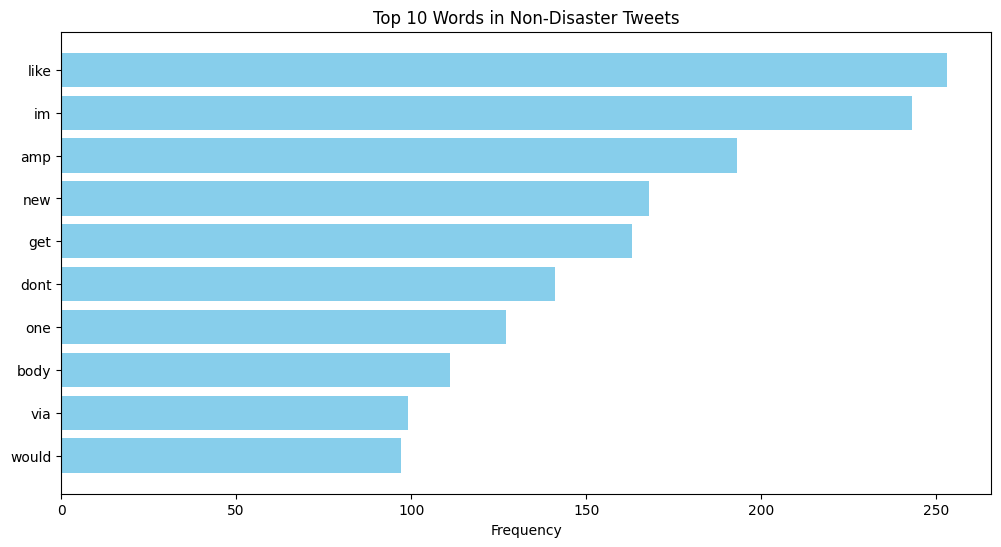

In [51]:
# Funcion para crear un histograma
def generate_histogram(word_freq, title, n=10):
    words, counts = zip(*word_freq.most_common(n))
    plt.figure(figsize=(12, 6))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# Generacion del histograma
generate_histogram(disaster_word_freq, 'Top 10 Words in Disaster Tweets')
generate_histogram(non_disaster_word_freq, 'Top 10 Words in Non-Disaster Tweets')

## Discusión

In [52]:
# Palabras comunes para tweets de desastre y no desaste
common_words_count = len(common_words)

# Muestra los tweets
common_words_count, list(common_words)[:10]

(3662,
 ['burned',
  'whale',
  'forgot',
  'plug',
  'used',
  'apparent',
  'concern',
  'jack',
  'turning',
  'root'])

## Modelo preliminar de predicción

Para el modelo preliminar utilizaresmos la implementacion Term Frequency-Inverse Document Frequency , esto para poder convertir el texto en caracterísiticas numéricas.

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data['processed_text'], data['target'], test_size=0.2, random_state=42)

# Transformar el texto usando TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Entrenar un modelo de Regresión Logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_tfidf, y_train)

# Predecir en el conjunto de prueba
y_pred = logreg.predict(X_test_tfidf)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


(0.8030203545633617,
 '              precision    recall  f1-score   support\n\n           0       0.79      0.89      0.84       874\n           1       0.82      0.68      0.75       649\n\n    accuracy                           0.80      1523\n   macro avg       0.81      0.79      0.79      1523\nweighted avg       0.81      0.80      0.80      1523\n')

La precisión global del modelo es razonablemente buena para ser un modelo preliminar, pero hay margen de mejora. 